In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# import smith waterman cluster comparisons
df = pd.read_csv(r"C:\Users\james\OneDrive\Documents\Bristol\Mini Project\gitlocal\dsmp-2024-group-6\global_comparison_results.csv")
df.head()

,Cluster 1,Cluster 2,Sequence 1,Sequence 2,Smith-Waterman Score
0,Cluster 1,Cluster 1,CASSADIEAFF,CASSADIEQYF,24
1,Cluster 2,Cluster 2,CASSADSAETLYF,CASGADSAETLYF,33
2,Cluster 1,Cluster 2,CASSADIEAFF,CASSADSAETLYF,18
3,Cluster 1,Cluster 2,CASSADIEAFF,CASGADSAETLYF,12
4,Cluster 1,Cluster 2,CASSADIEQYF,CASSADSAETLYF,18


In [3]:
df.rename(columns={'Cluster 1': 'Cluster_A' , 'Cluster 2': 'Cluster_B' , 'Sequence 1': 'Sequence_A', 'Sequence 2': 'Sequence_B'}, inplace=True)
df.head()

,Cluster_A,Cluster_B,Sequence_A,Sequence_B,Smith-Waterman Score
0,Cluster 1,Cluster 1,CASSADIEAFF,CASSADIEQYF,24
1,Cluster 2,Cluster 2,CASSADSAETLYF,CASGADSAETLYF,33
2,Cluster 1,Cluster 2,CASSADIEAFF,CASSADSAETLYF,18
3,Cluster 1,Cluster 2,CASSADIEAFF,CASGADSAETLYF,12
4,Cluster 1,Cluster 2,CASSADIEQYF,CASSADSAETLYF,18


In [4]:
# print number of rows
print("Number of rows: ", len(df))

Number of rows:  45850469


In [5]:
#trim whitespace from dataframe
df['Cluster_A'] = df['Cluster_A'].str.strip()
df['Cluster_B'] = df['Cluster_B'].str.strip()
df['Sequence_A'] = df['Sequence_A'].str.strip()
df['Sequence_B'] = df['Sequence_B'].str.strip()

In [6]:
# Assuming 'df' is your DataFrame and 'Cluster_A' is a column in it
cluster_A_unique = df['Cluster_A'].unique()

# Create a Pandas Series from the unique values
cluster_A_unique_series = pd.Series(cluster_A_unique)

In [7]:

print('before', len(cluster_A_unique_series))
cluster_A_unique_series.unique()
print('after', len(cluster_A_unique_series))


before 2233
after 2233


In [8]:
constraint = df[df['Cluster_A'] == 'Cluster 1'] 

#print(len(constraint))
print(constraint)

constraint = constraint.drop(columns=['Sequence_A', 'Sequence_B', 'Smith-Waterman Score'])

          Cluster_A     Cluster_B   Sequence_A     Sequence_B  \
0         Cluster 1     Cluster 1  CASSADIEAFF    CASSADIEQYF   
2         Cluster 1     Cluster 2  CASSADIEAFF  CASSADSAETLYF   
3         Cluster 1     Cluster 2  CASSADIEAFF  CASGADSAETLYF   
4         Cluster 1     Cluster 2  CASSADIEQYF  CASSADSAETLYF   
5         Cluster 1     Cluster 2  CASSADIEQYF  CASGADSAETLYF   
...             ...           ...          ...            ...   
31774847  Cluster 1     Cluster 1  CASSADIEAFF    CASSADIEQYF   
31774849  Cluster 1  Cluster 2995  CASSADIEAFF   CATWDRGAEAFF   
31774850  Cluster 1  Cluster 2995  CASSADIEAFF   CAAWDRGSEQYF   
31774851  Cluster 1  Cluster 2995  CASSADIEQYF   CATWDRGAEAFF   
31774852  Cluster 1  Cluster 2995  CASSADIEQYF   CAAWDRGSEQYF   

          Smith-Waterman Score  
0                           24  
2                           18  
3                           12  
4                           18  
5                           12  
...                  

In [9]:
print(constraint)
print('length before', len(constraint))
constraint = constraint.drop_duplicates()
print('length after', len(constraint))

          Cluster_A     Cluster_B
0         Cluster 1     Cluster 1
2         Cluster 1     Cluster 2
3         Cluster 1     Cluster 2
4         Cluster 1     Cluster 2
5         Cluster 1     Cluster 2
...             ...           ...
31774847  Cluster 1     Cluster 1
31774849  Cluster 1  Cluster 2995
31774850  Cluster 1  Cluster 2995
31774851  Cluster 1  Cluster 2995
31774852  Cluster 1  Cluster 2995

[50917 rows x 2 columns]
length before 50917
length after 2233


In [10]:
# check cluster_A only contains 'Cluster 1'


# filter the numberic values from the string values in Cluster_B
constraint['Cluster_B'] = constraint['Cluster_B'].str.extract('(\d+)').astype(int)

constraint = constraint.sort_values(by=['Cluster_B'])


In [11]:
# Sort clusterr_B in umeric order
constraint = constraint.sort_values(by=['Cluster_B'])
print(constraint)

         Cluster_A  Cluster_B
0        Cluster 1          1
2        Cluster 1          2
8        Cluster 1          3
16       Cluster 1          4
33       Cluster 1          5
...            ...        ...
2983822  Cluster 1       2991
2983828  Cluster 1       2992
2983834  Cluster 1       2993
2983840  Cluster 1       2994
2983846  Cluster 1       2995

[2233 rows x 2 columns]


In [12]:
# which rows are missing from the constraint dataframe
range(1, 2995)
missing = set(range(1, 2995)) - set(constraint['Cluster_B'])
print(missing)
print(len(missing))

missing = pd.Series(list(missing))

{2048, 2070, 2071, 2072, 2074, 2078, 2079, 2080, 2081, 2082, 2096, 2099, 2100, 2104, 2105, 2106, 2119, 2120, 2121, 2122, 2123, 2130, 2131, 2132, 2133, 2135, 2149, 2155, 2157, 2158, 2162, 2168, 2172, 2467, 2184, 2198, 2201, 2205, 2208, 2219, 2229, 2233, 2234, 2243, 2245, 2248, 2251, 2254, 2255, 2257, 2258, 2264, 2265, 2266, 2267, 2268, 2286, 2289, 2290, 2291, 2292, 2294, 2295, 2297, 2298, 2299, 2306, 2307, 2315, 2319, 2320, 2321, 2327, 2333, 2336, 2345, 2346, 2347, 2348, 2349, 2350, 2351, 2354, 2364, 2367, 2372, 2373, 2374, 2375, 2386, 2387, 340, 341, 342, 2388, 344, 345, 347, 348, 349, 350, 351, 353, 354, 355, 356, 2407, 362, 363, 364, 365, 366, 367, 368, 369, 2410, 2425, 2428, 2432, 387, 2435, 389, 2442, 2445, 2447, 2448, 2453, 2454, 408, 2456, 2461, 415, 416, 417, 418, 2463, 420, 421, 422, 2464, 424, 425, 426, 427, 428, 429, 430, 431, 2474, 2476, 2481, 2483, 437, 438, 439, 440, 441, 442, 444, 445, 446, 2494, 2495, 2497, 451, 452, 453, 454, 455, 457, 458, 459, 460, 461, 462, 464, 2513

In [13]:
missing.sort_values()

91      340
92      341
93      342
95      344
96      345
       ... 
522    2985
523    2986
524    2987
526    2988
527    2989
Length: 762, dtype: int64

In [14]:
df_cluster_A_one = df[df['Cluster_A'] == 'Cluster 1']
print(df_cluster_A_one)

          Cluster_A     Cluster_B   Sequence_A     Sequence_B  \
0         Cluster 1     Cluster 1  CASSADIEAFF    CASSADIEQYF   
2         Cluster 1     Cluster 2  CASSADIEAFF  CASSADSAETLYF   
3         Cluster 1     Cluster 2  CASSADIEAFF  CASGADSAETLYF   
4         Cluster 1     Cluster 2  CASSADIEQYF  CASSADSAETLYF   
5         Cluster 1     Cluster 2  CASSADIEQYF  CASGADSAETLYF   
...             ...           ...          ...            ...   
31774847  Cluster 1     Cluster 1  CASSADIEAFF    CASSADIEQYF   
31774849  Cluster 1  Cluster 2995  CASSADIEAFF   CATWDRGAEAFF   
31774850  Cluster 1  Cluster 2995  CASSADIEAFF   CAAWDRGSEQYF   
31774851  Cluster 1  Cluster 2995  CASSADIEQYF   CATWDRGAEAFF   
31774852  Cluster 1  Cluster 2995  CASSADIEQYF   CAAWDRGSEQYF   

          Smith-Waterman Score  
0                           24  
2                           18  
3                           12  
4                           18  
5                           12  
...                  

In [15]:
# remove 'cluster ' from cluster A and cluster B #### TEST BLOCK IS A TEST
df['Cluster_A'] = df['Cluster_A'].str.replace('Cluster ', '')
df['Cluster_B'] = df['Cluster_B'].str.replace('Cluster ', '')

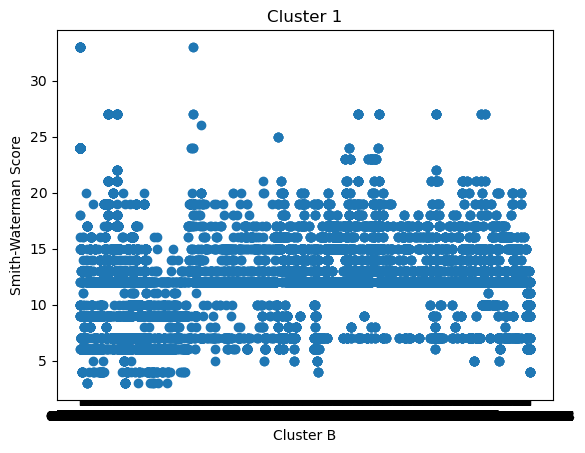

In [16]:
# plot clusters cluster_A and cluster_B together with smith-waterman score in a scatter plot
plt.scatter(df_cluster_A_one['Cluster_B'], df_cluster_A_one['Smith-Waterman Score'])
plt.xlabel('Cluster B')
plt.ylabel('Smith-Waterman Score')
plt.title('Cluster 1')
plt.show()
 

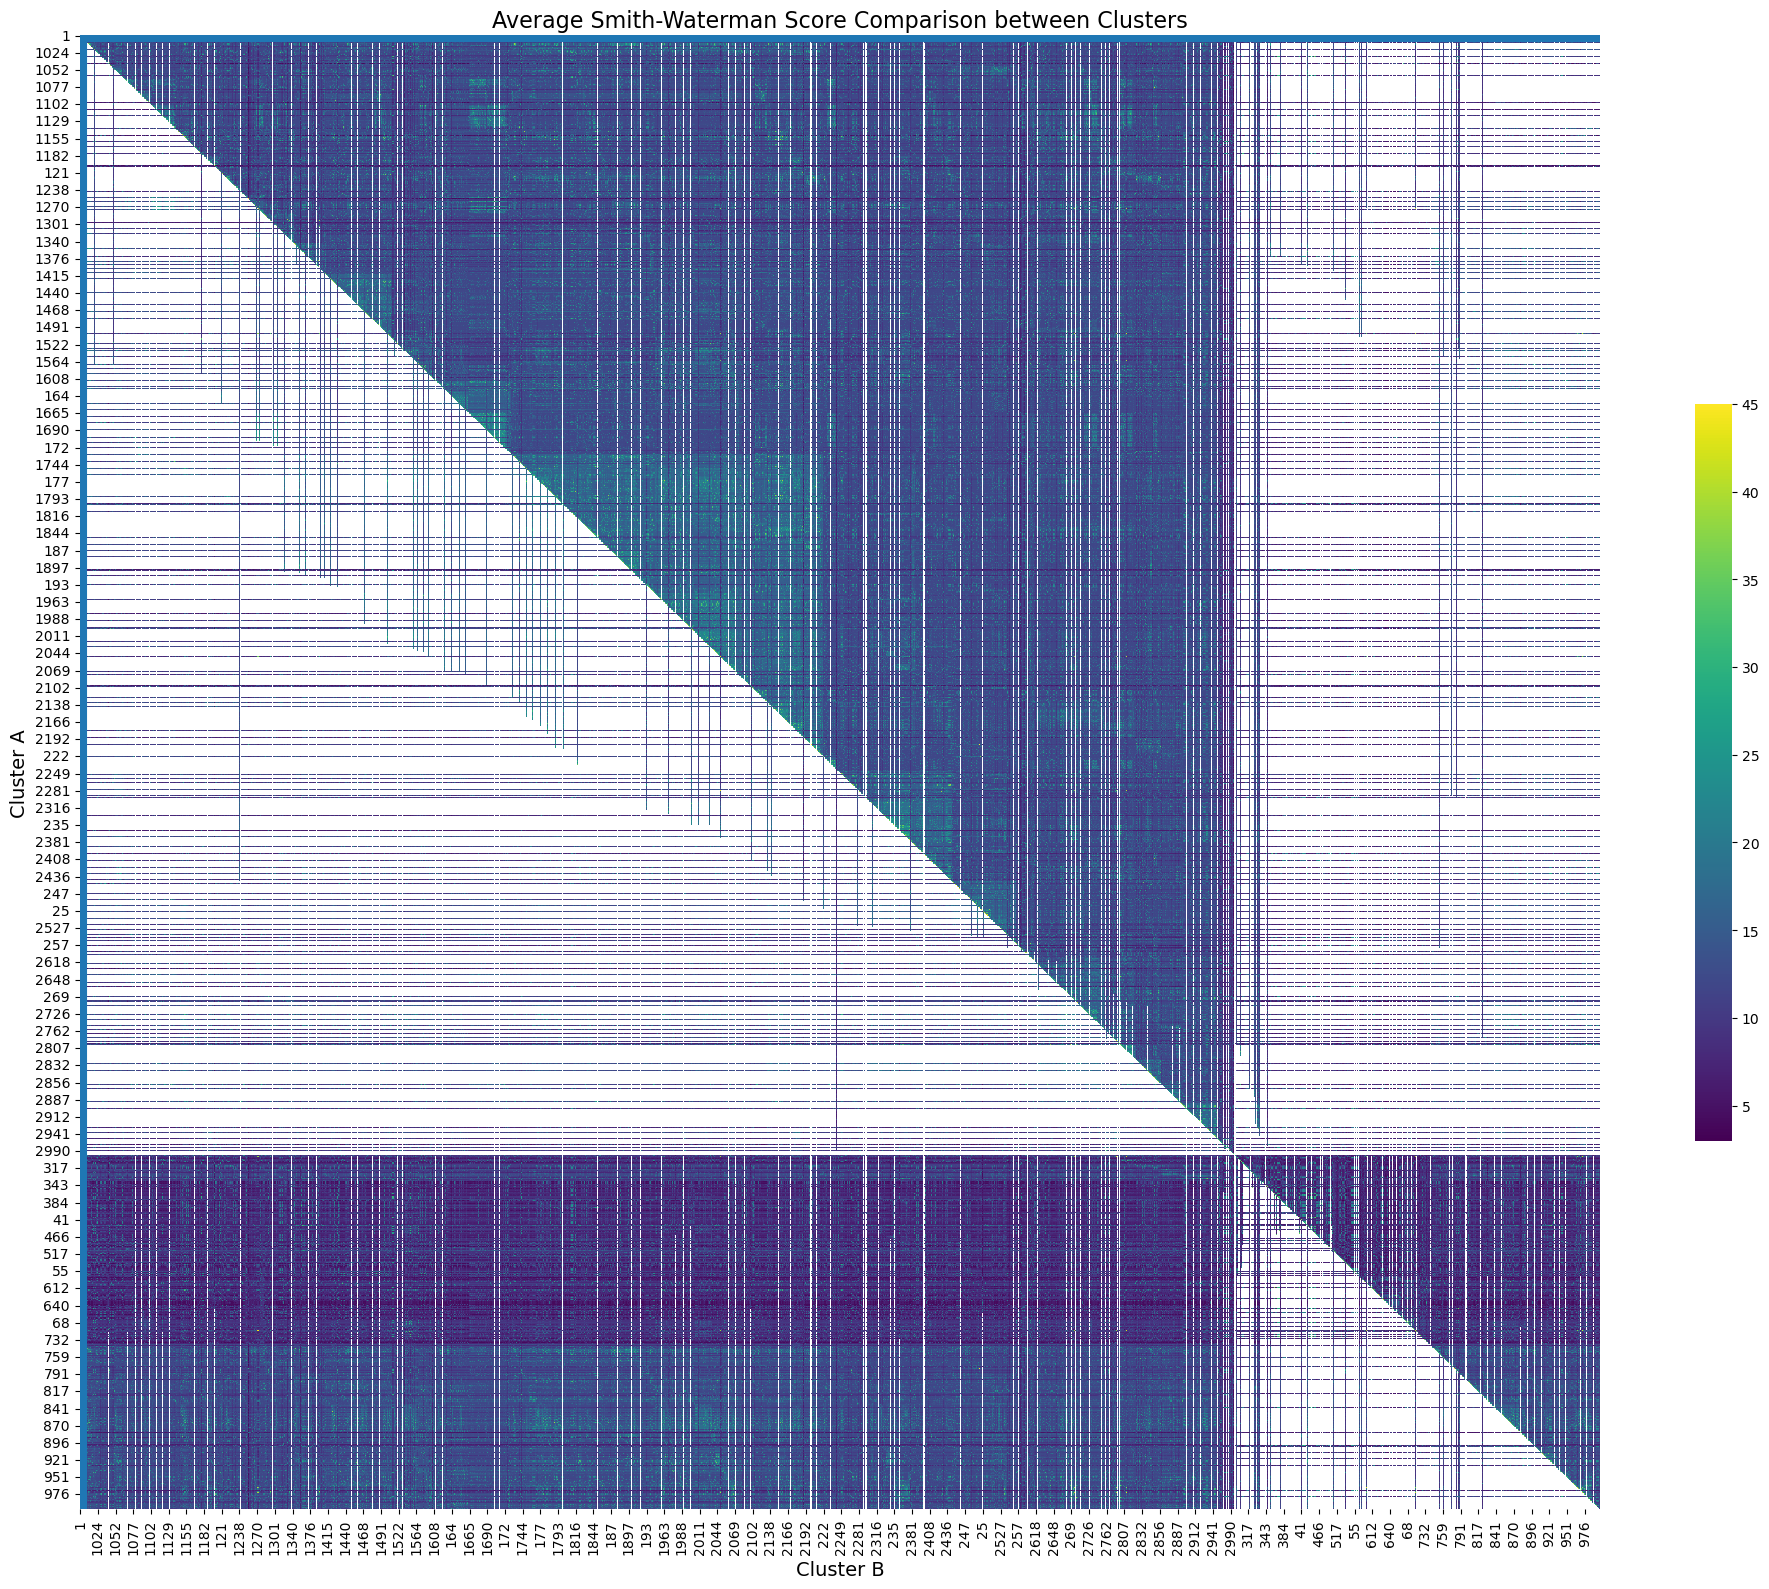

In [17]:
heatmap_data = df.pivot_table(index='Cluster_A', columns='Cluster_B', values='Smith-Waterman Score', aggfunc='mean')

# Plot heatmap
# Now let's create an improved heatmap visualization
plt.figure(figsize=(20, 16))  # Increase figure size for better readability

# Generate a heatmap with adjusted aspects
ax = sns.heatmap(heatmap_data, cmap='viridis', annot=False, fmt=".1f", cbar_kws={'shrink': .5})

# Rotate x-axis and y-axis labels for better readability if there are many categories
plt.xticks(rotation=90)
plt.yticks(rotation=0)

# Adjust fontsize for the colorbar
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=10)

# Set titles and labels
plt.title('Average Smith-Waterman Score Comparison between Clusters', fontsize=16)
plt.xlabel('Cluster B', fontsize=14)
plt.ylabel('Cluster A', fontsize=14)

# Show gridlines
ax.hlines(range(len('Clusters_A')), *ax.get_xlim())
ax.vlines(range(len('Clusters_B')), *ax.get_ylim())

# Finally, display the plot
plt.tight_layout()  # Adjust the plot to ensure everything fits without overlapping
plt.show()

In [18]:
# Assuming 'df' is your pre-loaded DataFrame with the necessary data
# Add columns to the dataframe for sorting
df['Cluster_A_Num'] = df['Cluster_A'].str.extract('(\d+)').astype(int)
df['Cluster_B_Num'] = df['Cluster_B'].str.extract('(\d+)').astype(int)

# Create the pivot table
heatmap_data = df.pivot_table(index='Cluster_A', columns='Cluster_B', values='Smith-Waterman Score', aggfunc='mean')

# Now, we need to sort the pivot table, but first, we sort the DataFrame itself
df_sorted = df.sort_values(by=['Cluster_A_Num', 'Cluster_B_Num'])

# Create a new pivot table with sorted clusters
heatmap_data_sorted = df_sorted.pivot_table(index='Cluster_A', columns='Cluster_B', values='Smith-Waterman Score', aggfunc='mean')

# Now let's create an improved heatmap visualization
plt.figure(figsize=(40, 32))  # Increase figure size for better readability

# Generate a heatmap with adjusted aspects
ax = sns.heatmap(heatmap_data_sorted, cmap='viridis', annot=False, fmt=".1f", cbar_kws={'shrink': .5})

# Rotate x-axis and y-axis labels for better readability if there are many categories
plt.xticks(rotation=90)
plt.yticks(rotation=0)

# Adjust fontsize for the colorbar
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=20)  # Increase fontsize for better readability

# Set titles and labels
plt.title('Average Smith-Waterman Score Comparison between Clusters', fontsize=24)
plt.xlabel('Cluster B', fontsize=20)
plt.ylabel('Cluster A', fontsize=20)

# Show gridlines - use the actual number of clusters from the DataFrame
ax.hlines(range(heatmap_data_sorted.shape[0]), *ax.get_xlim())
ax.vlines(range(heatmap_data_sorted.shape[1]), *ax.get_ylim())

# Finally, display the plot
plt.tight_layout()  # Adjust the plot to ensure everything fits without overlapping
plt.show()


KeyboardInterrupt: 